***

*Course:* [Math 535](https://people.math.wisc.edu/~roch/mmids/) - Mathematical Methods in Data Science (MMiDS)  
*Chapter:* 4-Spectral graph theory   
*Author:* [Sebastien Roch](https://people.math.wisc.edu/~roch/), Department of Mathematics, University of Wisconsin-Madison  
*Updated:* Jan 6, 2024   
*Copyright:* &copy; 2024 Sebastien Roch

***

In [ ]:
# IF RUNNING ON GOOGLE COLAB, UNCOMMENT THE FOLLOWING CODE CELL
# When prompted, upload: 
#     * mmids.py
# from your local file system
# Files at: https://github.com/MMiDS-textbook/MMiDS-textbook.github.io/tree/main/utils
# Alternative instructions: https://colab.research.google.com/notebooks/io.ipynb

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [ ]:
# PYTHON 3
import numpy as np
from numpy import linalg as LA
from numpy.random import default_rng
rng = default_rng(535)
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import mmids

## Motivating example: finding communities

In this chapter, we analyze datasets in the form of networks. As motivation, we first look at the [Karate Club dataset](https://en.wikipedia.org/wiki/Zachary%27s_karate_club). 

From [Wikipedia](https://en.wikipedia.org/wiki/Zachary%27s_karate_club):
> A social network of a karate club was studied by Wayne W. Zachary for a period of three years from 1970 to 1972. The network captures 34 members of a karate club, documenting links between pairs of members who interacted outside the club. During the study a conflict arose between the administrator "John A" and instructor "Mr. Hi" (pseudonyms), which led to the split of the club into two. Half of the members formed a new club around Mr. Hi; members from the other part found a new instructor or gave up karate. Based on collected data Zachary correctly assigned all but one member of the club to the groups they actually joined after the split.

![Karate club network](https://upload.wikimedia.org/wikipedia/commons/thumb/0/0d/Social_Network_Model_of_Relationships_in_the_Karate_Club.png/480px-Social_Network_Model_of_Relationships_in_the_Karate_Club.png)

**Figure:** Karate Club network ([Source](https://commons.wikimedia.org/wiki/File:Social_Network_Model_of_Relationships_in_the_Karate_Club.png))

We use the [`NetworkX`](https://networkx.org) package to load the data and vizualize it. We will say more about it later in this chapter. In the meantime, there is a good tutorial [here](https://networkx.org/documentation/stable/tutorial.html).

In [ ]:
import networkx as nx

In [ ]:
G = nx.karate_club_graph()
nx.draw_networkx(G)

Our goal: 

> identify natural sub-communities in the network 

That is, we want to find groups of nodes that have many links between them, but relatively few with the other nodes. 

It will turn out that the eigenvectors of the Laplacian matrix, a matrix naturally associated to the graph, contain useful information about such communities.

## Background: review of graphs and associated matrices

**NUMERICAL CORNER:** In Python, the [`NetworkX`](https://networkx.org) package provides many functionalities for defining, modifying and plotting graphs. For instance, many standard graphs can be defined conveniently. The [`petersen_graph()`](https://networkx.org/documentation/stable/reference/generated/networkx.generators.small.petersen_graph.html#networkx.generators.small.petersen_graph) function defines the Petersen graph.

In [ ]:
import networkx as nx

In [ ]:
G = nx.petersen_graph()

This graph can be plotted using the function [`draw_networkx()`](https://networkx.org/documentation/networkx-1.7/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html).

In [ ]:
nx.draw_networkx(G, node_size=600, node_color='black', font_size=16, font_color='white')

Other standard graphs can be generated with special functions, e.g. complete graphs using [`complete_graph()`](https://networkx.org/documentation/stable/reference/generated/networkx.generators.classic.complete_graph.html#networkx.generators.classic.complete_graph). See [here](https://networkx.org/documentation/stable/reference/generators.html#module-networkx.generators.classic) for a complete list.

In [ ]:
G = nx.complete_graph(3)

In [ ]:
nx.draw_networkx(G, node_size=600, node_color='black', font_size=16, font_color='white')

See [here](https://networkx.org/documentation/stable/reference/functions.html) and [here](https://networkx.org/documentation/stable/reference/algorithms/index.html) for a list of functions to access various properties of a graph. Here are a few examples:

In [ ]:
G = nx.path_graph(10)

In [ ]:
nx.draw_networkx(G, node_size=600, node_color='black', font_size=16, font_color='white')

In [ ]:
G.number_of_nodes() # number of nodes

In [ ]:
G.number_of_edges() # number of edges

In [ ]:
G.has_node(7) # checks whether the graph has a particular vertex

In [ ]:
G.has_node(10)

In [ ]:
G.has_edge(0, 1) # checks whether the graph has a particular vertex

In [ ]:
G.has_edge(0, 2)

In [ ]:
[n for n in G.neighbors(2)] # returns a list of neighbors of the specified vertex

In [ ]:
nx.is_connected(G) # checks whether the graph is connected

In [ ]:
[cc for cc in nx.connected_components(G)] # returns the connected components

In [ ]:
for e in G.edges():
    print(e)

Another way of specifying a graph is to start with an empty graph with a given number of vertices and then add edges one by one. The following command creates a graph with $4$ vertices and no edge (see [`empty_graph()`](https://networkx.org/documentation/stable/reference/generated/networkx.generators.classic.empty_graph.html#networkx.generators.classic.empty_graph)).

In [ ]:
G = nx.empty_graph(4)

In [ ]:
G.add_edge(0, 1)
G.add_edge(2, 3)
G.add_edge(0, 3)
G.add_edge(3, 0)

In [ ]:
nx.draw_networkx(G, node_size=600, node_color='black', font_size=16, font_color='white')

$\unlhd$

**NUMERICAL CORNER:** The package `NetworkX` also supports digraphs.

In [ ]:
G = nx.DiGraph()
nx.add_star(G, [0, 1, 2, 3, 4])

In [ ]:
nx.draw_networkx(G, node_size=600, node_color='black', font_size=16, font_color='white')

Another way of specifying a digraph is to start with an empty graph with a given number of vertices and then add edges one by one (compare to the undirected case above). The following command creates a graph with no vertices.

In [ ]:
G = nx.DiGraph()

In [ ]:
G.add_edge(0, 1)
G.add_edge(2, 3)
G.add_edge(0, 3)
G.add_edge(3, 0)
G.add_edge(1,1)

In [ ]:
nx.draw_networkx(G, node_size=600, node_color='black', font_size=16, font_color='white')

$\unlhd$

**NUMERICAL CORNER:** Using `NetworkX`, the adjacency matrix of a graph can be obtained with [`adjacency_matrix()`](https://networkx.org/documentation/stable/reference/generated/networkx.linalg.graphmatrix.adjacency_matrix.html). By default, it returns a `SciPy` sparse matrix. Alternatively, one can get a regular array with [`toarray()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.toarray.html). Recall that in NumPy (and SciPy) array indices start at $0$. Consistently, NetworkX also names vertices starting at $0$. **Note, however, that this conflicts with our mathematical conventions.**

In [ ]:
G = nx.complete_graph(3)

In [ ]:
A = nx.adjacency_matrix(G)
print(A)

In [ ]:
A = nx.adjacency_matrix(G).toarray()
print(A)

In [ ]:
G = nx.petersen_graph()
A = nx.adjacency_matrix(G)
print(A)

The incidence matrix is obtained with [`incidence_matrix()`](https://networkx.org/documentation/stable/reference/generated/networkx.linalg.graphmatrix.incidence_matrix.html) -- again as a sparse array.

In [ ]:
B = nx.incidence_matrix(G)
print(B)

In [ ]:
B = nx.incidence_matrix(G).toarray()
print(B)

In the digraph case, the definitions are adapted as follows. The adjacency matrix $A$ of a digraph $G = (V, E)$ is the matrix
defined as

\begin{align*}
A_{xy} 
= 
\begin{cases}
1 & \text{if $(x,y) \in E$}\\ 
0 & \text{o.w.}
\end{cases}
\end{align*}

The incidence matrix of a digraph $G$ with vertices $1,\ldots,n$ and edges $e_1, \ldots, e_m$ is the matrix $B$ such that $B_{ij} = -1$ if egde $e_j$ leaves vertex $i$, $B_{ij} = 1$ if egde $e_j$ enters vertex $i$, and 0 otherwise. 

**NUMERICAL CORNER:** We revisit an earlier directed graph.

In [ ]:
G = nx.DiGraph()

In [ ]:
G.add_edge(0, 1)
G.add_edge(2, 3)
G.add_edge(0, 3)
G.add_edge(3, 0)
G.add_edge(1,1)

We compute the adjacency and incidence matrices. For the incidence matrix, one must specify `oriented=True` for the oriented version.

In [ ]:
A = nx.adjacency_matrix(G).toarray()
print(A)

In [ ]:
B = nx.incidence_matrix(G, oriented=True).toarray()
print(B)

Revisiting an ealier undirected graph, we note that `incidence_matrix()` can also produce an arbitrary oriented incidence matrix by using the `oriented=True` option.

In [ ]:
G = nx.empty_graph(4)

In [ ]:
G.add_edge(0, 1)
G.add_edge(2, 3)
G.add_edge(0, 3)
G.add_edge(3, 0)

In [ ]:
B = nx.incidence_matrix(G, oriented=True).toarray()
print(B)

$\unlhd$

## Spectral properties of the Laplacian matrix

**NUMERICAL CORNER:** One use of the spectral decomposition of the Laplacian matrix is in graph drawing. We illustrate this next. Given a graph $G = (V, E)$, it is not clear a priori how to draw it in the plane since the only information available are adjacencies of vertices. One approach is just to position the vertices at random. The function [`networkx.draw()`](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw.html) or [`networkx.draw_networkx()`](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html#networkx.drawing.nx_pylab.draw_networkx)can take as input different [graph layout](https://networkx.org/documentation/stable/reference/drawing.html#module-networkx.drawing.layout) functions that return an $x$ and $y$-coordinate for each vertex.

We will test this on a grid graph. Sometimes a picture is worth a thousand words. This is an example of a $4 \times 7$-grid graph.

![Grid graph](https://mathworld.wolfram.com/images/eps-gif/GridGraph_701.gif)

**Figure:** Grid graph ([Source](https://mathworld.wolfram.com/GridGraph.html))

We use [`grid_2d_graph()`](https://networkx.org/documentation/stable/reference/generated/networkx.generators.lattice.grid_2d_graph.html) to construct such a graph.

In [ ]:
G = nx.grid_2d_graph(4,7)

One layout approach is to choose random locations for the nodes. Specifically, for every node, a position is generated by choosing each coordinate uniformly at random on the interval $[0,1]$.

In [ ]:
nx.draw(G, pos=nx.random_layout(G))

Clearly, this is a lot harder to read than the original graph above. 

Another approach is to map the vertices to two eigenvectors, similarly to what we did for dimensionality reduction. The eigenvector associated to $\mu_1$ is constant and therefore not useful for drawing. We try the next two. We use the Laplacian matrix.

In [ ]:
nx.draw(G, pos=nx.spectral_layout(G))

Interestingly, the outcome is very similar to the original, more natural drawing. We will come back later to try to explain this, after we have developed further understanding of the spectral properties of the Laplacian matrix.

$\unlhd$

**NUMERICAL CORNER:** We construct a graph with two connected components and check the results above. We work directly with the adjacency matrix.

In [ ]:
A = np.array([[0, 1, 1, 0, 0], [1, 0, 1, 0, 0], [1, 1, 0, 0, 0], [0, 0, 0, 0, 1], [0, 0, 0, 1, 0]])
print(A)

Note the block structure.

The degrees can be obtained by summing the rows of the adjacency matrix.

In [ ]:
degrees = A.sum(axis=1)
print(degrees)

In [ ]:
D = np.diag(degrees)
print(D)

In [ ]:
L = D - A
print(L)

In [ ]:
LA.eigvals(L)

Observe that (up to numerical error) there are two $0$ eigenvalues and that the largest eigenvalue is greater or equal than the maximum degree plus one.

To compute the Laplacian matrix, one can also use the function `laplacian_matrix()`. For example, the Laplacian of the Petersen graph is the following:

In [ ]:
G = nx.petersen_graph()
L = nx.laplacian_matrix(G).toarray()
print(L)

In [ ]:
LA.eigvals(L)

$\unlhd$

**NUMERICAL CORNER:** This is perhaps easiest to see on a path graph. *Note:* `NetworkX` numbers vertices $0,\ldots,n-1$. 

In [ ]:
G = nx.path_graph(10)

In [ ]:
nx.draw_networkx(G, 
                 node_size=600, node_color='black',
                 font_size=16, font_color='white', 
                 pos=nx.random_layout(G, seed=535)
                )

We plot the second Laplacian eigenvector (i.e., the eigenvector of the Laplacian matrix corresponding to the second smallest eigenvalue). We use [`numpy.argsort()`](https://numpy.org/doc/stable/reference/generated/numpy.argsort.html) to find the index of the second smallest eigenvalue. Because indices start at `0`, we want entry `1` of the output of `np.argsort()`.

In [ ]:
L = nx.laplacian_matrix(G).toarray()
w, v = LA.eigh(L)
y2 = v[:,np.argsort(w)[1]]

In [ ]:
plt.plot(y2)
plt.show()

$\unlhd$

## Application to graph partitioning

In [6]:
G_tree = nx.random_tree(n=6, seed=111)

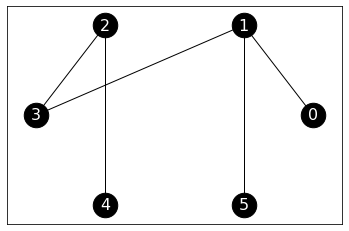

In [7]:
nx.draw_networkx(G_tree, pos=nx.circular_layout(G_tree),
                 node_size=600, node_color="black", 
                 font_size=16, font_color="white")

**NUMERICAL CORNER:** **(A random tree)** We return to the random tree example above. We claimed that $\phi_G = 1/3$. The maximum degree is $\bar{\delta} = 3$. We now compute $\mu_2$. We first compute the Laplacian matrix.

In [8]:
phi_G = 1/3
max_deg = 3

We now compute $\mu_2$. We first compute the Laplacian matrix.

In [9]:
L_tree = nx.laplacian_matrix(G_tree).toarray()
print(L_tree)

[[ 1 -1  0  0  0  0]
 [-1  3  0 -1  0 -1]
 [ 0  0  2 -1 -1  0]
 [ 0 -1 -1  2  0  0]
 [ 0  0 -1  0  1  0]
 [ 0 -1  0  0  0  1]]


In [10]:
w, v = LA.eigh(L_tree) 
mu_2 = np.sort(w)[1]
print(mu_2)

0.32486912943335355


We check Cheeger's inequality. The left-hand side is:

In [11]:
(phi_G ** 2) / (2 * max_deg)

0.018518518518518517

The right-hand side is:

In [12]:
2 * phi_G

0.6666666666666666

$\unlhd$

**NUMERICAL CORNER:** We implement the graph cutting algorithm above.

We now implement our heuristic in Python. We first write an auxiliary function that takes as input an adjacency matrix, an ordering of the vertices and a value $k$. It returns the cut ratio for the first $k$ vertices in the order.

In [13]:
def cut_ratio(A, order, k):
    n = A.shape[0] # number of vertices
    edge_boundary = 0 # initialize size of edge boundary 
    for i in range(k+1): # for all vertices before cut
        for j in range(k+1,n): # for all vertices after cut
            edge_boundary += A[order[i],order[j]] # add one if {i,j} in E
    denominator = np.minimum(k+1, n-k-1)
    return edge_boundary/denominator

Using the `cut_ratio` function, we first compute the Laplacian, find the second eigenvector and corresponding order of vertices. Then we compute the cut ratio for every $k$. Finally we output the cut (both $S_k$ and $S_k^c$) corresponding to the minimum, as a tuple of arrays.

In [14]:
def spectral_cut2(A):
    n = A.shape[0] # number of vertices
    
    # laplacian
    degrees = A.sum(axis=1)
    D = np.diag(degrees)
    L = D - A

    # spectral decomposition
    w, v = LA.eigh(L) 
    order = np.argsort(v[:,np.argsort(w)[1]]) # index of entries in increasing order
    
    # cut ratios
    phi = np.zeros(n-1) # initialize cut ratios
    for k in range(n-1):
        phi[k] = cut_ratio(A, order, k)
    imin = np.argmin(phi) # find best cut ratio
    return order[0:imin+1], order[imin+1:n]

We will illustrate this on the path graph.

In [15]:
n = 10
G = nx.path_graph(n)

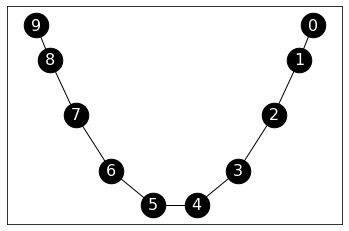

In [16]:
nx.draw_networkx(G, 
                 node_size=600, node_color='black',
                 font_size=16, font_color='white',
                 pos=nx.spectral_layout(G)
                )

We apply our spectral-based cutting algorihtm.

In [17]:
A = nx.adjacency_matrix(G).toarray()
s, sc = spectral_cut2(A)
print(s)
print(sc)

[0 1 2 3 4]
[5 6 7 8 9]


To help with vizualizing the output, we write a function coloring the vertices according to which side of the cut they are on.

In [18]:
def viz_cut(G, s, layout):
    n = G.number_of_nodes()
    assign = np.ones(n)
    assign[s] = 2
    nx.draw_networkx(G, node_color=assign, pos=layout(G), with_labels=False)

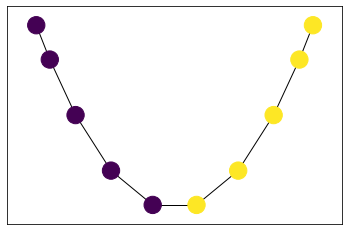

In [19]:
viz_cut(G, s, nx.spectral_layout)

Let's try it on the grid graph. Can you guess what the cut will be?

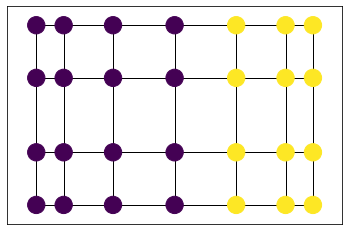

In [20]:
G = nx.grid_2d_graph(4,7)
A = nx.adjacency_matrix(G).toarray()
s, sc = spectral_cut2(A)
viz_cut(G, s, nx.spectral_layout)

$\unlhd$

**Back to community detection** We return to the [Karate Club dataset](https://en.wikipedia.org/wiki/Zachary%27s_karate_club) from the lecture.

In [21]:
G = nx.karate_club_graph()
n = G.number_of_nodes()
A = nx.adjacency_matrix(G).toarray()

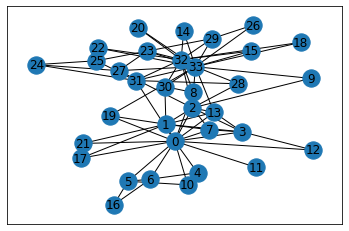

In [22]:
nx.draw_networkx(G)

We seek to find natural sub-communities. We use the spectral properties of the Laplacian as described in the lectures.

We use our `spectral_cut2` and `viz_cut` functions to compute a good cut and vizualize it.

In [23]:
s, sc = spectral_cut2(A)
print(s)
print(sc)

[18 26 20 14 29 22 24 15 23 25 32 27  9 33 31 28 30  8]
[ 2 13  1 19  7  3 12  0 21 17 11  4 10  6  5 16]


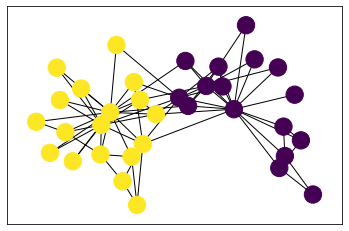

In [24]:
viz_cut(G, s, nx.spring_layout)

It is not trivial to assess the quality of the resulting cut. But this particular example has a known ground-truth community structure (which partly explains its widespread use). Quoting from [Wikipedia](https://en.wikipedia.org/wiki/Zachary%27s_karate_club):
> A social network of a karate club was studied by Wayne W. Zachary for a period of three years from 1970 to 1972. The network captures 34 members of a karate club, documenting links between pairs of members who interacted outside the club. During the study a conflict arose between the administrator "John A" and instructor "Mr. Hi" (pseudonyms), which led to the split of the club into two. Half of the members formed a new club around Mr. Hi; members from the other part found a new instructor or gave up karate. Based on collected data Zachary correctly assigned all but one member of the club to the groups they actually joined after the split.

This ground truth is the following.

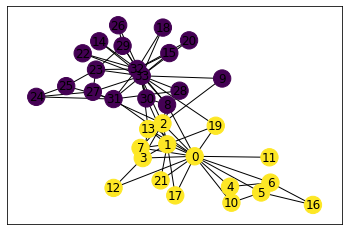

In [25]:
truth = np.array([2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 
    1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
nx.draw_networkx(G, node_color=truth, pos=nx.spring_layout(G))

You can check that our cut perfectly matches the ground truth.